In [96]:
import sys
from utils import print_json
from utils.cloudant_utils import cloudant_db as db, save_doc
from datetime import date
import numpy as np
import pandas as pd

In [97]:
fields = ["_id", "releases", "stars", "watchers", "commits", "forks", "issues"]
repos = [r for r in db.get_query_result({"type": "release"}, ["_id", "releases"], 
                                        limit=10000, raw_result=True)["docs"]]

In [98]:
# columns = repos[0]['releases'][0].keys()
print(repos[0]['releases'][0].keys())
values = [r for release in repos for r in release["releases"]]
df = pd.DataFrame(values)
# df = df[df['release_date'] > '2020-01-01']
# df['release_count'] = df.groupby('repo')['release_tag'].transform('count')


dict_keys(['repo', 'release_tag', 'release_date', 'downloads', 'stars', 'watchers', 'forks', 'commits', 'issues', 'total_stars', 'total_watchers', 'total_forks', 'total_commits', 'total_issues', 'total_closedIssues', 'closedIssues', 'readme', 'readme_size'])


In [ ]:
print(df.shape)

In [70]:
df[df["repo"]=="42-AI/bootcamp_machine-learning"]

,repo,release_tag,release_date,downloads,stars,watchers,forks,commits,issues,issuesClosed,readme,readme_size,added,deleted,changed,contributors
32,42-AI/bootcamp_machine-learning,v2.0.0,2020-06-25T15:05:27Z,7,78,0,23,0,54,53.0,"<p align=""center"">\n <img src=""assets/logo_v4...",2523.0,46016.0,28356.0,529.0,8.0
33,42-AI/bootcamp_machine-learning,version/v3.0.1,2022-02-10T15:16:51Z,1,3,0,0,0,52,26.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",2742.0,51419.0,28761.0,565.0,9.0
34,42-AI/bootcamp_machine-learning,version/v4.0.0,2022-02-24T20:04:49Z,0,2,0,0,0,3,1.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3231.0,73011.0,45284.0,567.0,10.0
35,42-AI/bootcamp_machine-learning,version/v4.0.1,2022-02-27T23:16:31Z,15,2,0,1,0,6,4.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3231.0,86760.0,45468.0,576.0,11.0
36,42-AI/bootcamp_machine-learning,version/v4.0.2,2022-03-05T17:24:29Z,0,0,0,0,0,11,10.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3231.0,86948.0,45599.0,584.0,11.0
37,42-AI/bootcamp_machine-learning,version/v4.0.3,2022-03-08T06:58:56Z,2,2,0,0,0,4,3.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3253.0,86948.0,45599.0,584.0,11.0
38,42-AI/bootcamp_machine-learning,version/v4.0.4,2022-03-11T07:15:49Z,1,0,0,0,0,0,0.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3253.0,86948.0,45599.0,584.0,11.0
39,42-AI/bootcamp_machine-learning,version/v4.0.5,2022-03-15T13:36:20Z,0,0,0,0,0,1,1.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3253.0,86958.0,45611.0,586.0,11.0
40,42-AI/bootcamp_machine-learning,version/v4.0.6,2022-03-16T09:23:33Z,0,0,0,0,0,0,0.0,"<p align=""center"">\n <img src=""assets/42ai_lo...",3253.0,86958.0,45611.0,586.0,11.0


In [5]:
# print(repos.groups)
# for name, group in repos:
# print(name, 'contains', group.shape[0], 'releases')
# print(df)
# print(df.get_group('10up/classifai').count())

In [71]:
new_df = df.groupby('repo').agg(
        forks=pd.NamedAgg(column="forks", aggfunc="sum"),
        downloads=pd.NamedAgg(column="downloads", aggfunc="sum"),
        issues=pd.NamedAgg(column="issues", aggfunc="sum"),
        issuesClosed=pd.NamedAgg(column="issuesClosed", aggfunc="sum"),
        stars=pd.NamedAgg(column="stars", aggfunc="sum"),
        commits=pd.NamedAgg(column="commits", aggfunc="sum"),
        release_counts=pd.NamedAgg(column="release_tag", aggfunc="count")
    )

In [72]:
print(new_df.shape)
print(list(new_df.columns))


(2347, 7)
['forks', 'downloads', 'issues', 'issuesClosed', 'stars', 'commits', 'release_counts']


In [73]:
new_df.head()

,forks,downloads,issues,issuesClosed,stars,commits,release_counts
repo,,,,,,,
100/Solid,0,0,0,0.0,0,0,2
10up/classifai,23,0,56,48.0,209,0,11
1adrianb/face-alignment,287,0,0,0.0,1519,0,10
1adrianb/pytorch-estimate-flops,0,0,5,0.0,121,0,8
404notf0und/FXY,0,17,0,0.0,27,52,1


In [ ]:
new_df['20downloads']= np.where(new_df['downloads'] > 20, 1, 0)

In [86]:
new_df['50downloads']= np.where(new_df['downloads'] > 50, 1, 0)

In [91]:
new_df['50stars']= np.where(new_df['stars'] > 50, 1, 0)

In [85]:
new_df[new_df['downloads'] > 20]

,forks,downloads,issues,issuesClosed,stars,commits,release_counts,20downloads
repo,,,,,,,,
42-AI/bootcamp_machine-learning,24,26,131,98.0,87,0,9,1
42-AI/bootcamp_python,0,26,96,52.0,149,0,3,1
4paradigm/OpenMLDB,0,2941,0,0.0,1146,0,13,1
ARM-software/armnn,0,1251,0,0.0,331,0,21,1
Adeel-Intizar/Xtreme-Vision,20,386,0,0.0,74,0,1,1
...,...,...,...,...,...,...,...,...
zhongkaifu/RNNSharp,0,1100,0,0.0,0,0,2,1
zhongkaifu/Seq2SeqSharp,4,299,18,0.0,17,0,3,1
zipzou/captcha-recognition,0,44,0,0.0,52,0,1,1


In [75]:
new_df[new_df['stars'] > 50]

,forks,downloads,issues,issuesClosed,stars,commits,release_counts
repo,,,,,,,
10up/classifai,23,0,56,48.0,209,0,11
1adrianb/face-alignment,287,0,0,0.0,1519,0,10
1adrianb/pytorch-estimate-flops,0,0,5,0.0,121,0,8
42-AI/bootcamp_machine-learning,24,26,131,98.0,87,0,9
42-AI/bootcamp_python,0,26,96,52.0,149,0,3
...,...,...,...,...,...,...,...
zjunlp/DeepKE,0,0,0,0.0,99,0,1
zvtvz/zvt,91,0,74,64.0,233,0,17
zyddnys/manga-image-translator,47,1782,9,0.0,207,0,4


In [77]:
new_df

,forks,downloads,issues,issuesClosed,stars,commits,release_counts,20downloads
repo,,,,,,,,
100/Solid,0,0,0,0.0,0,0,2,0
10up/classifai,23,0,56,48.0,209,0,11,0
1adrianb/face-alignment,287,0,0,0.0,1519,0,10,0
1adrianb/pytorch-estimate-flops,0,0,5,0.0,121,0,8,0
404notf0und/FXY,0,17,0,0.0,27,52,1,0
...,...,...,...,...,...,...,...,...
zurutech/ashpy,1,0,0,0.0,11,0,3,0
zvtvz/zvt,91,0,74,64.0,233,0,17,0
zyddnys/manga-image-translator,47,1782,9,0.0,207,0,4,1


In [33]:
# new_df[new_df['20downloads'] == 1]

In [78]:
new_df.groupby('20downloads').mean()

,forks,downloads,issues,issuesClosed,stars,commits,release_counts
20downloads,,,,,,,
0,54.452070,0.499716,7.366988,4.264889,368.214407,3.063528,10.627907
1,163.859589,124297.720890,8.825342,5.558219,715.664384,11.207192,16.363014


In [87]:
new_df.groupby('50downloads').mean()

,forks,downloads,issues,issuesClosed,stars,commits,release_counts,20downloads
50downloads,,,,,,,,
0,53.525479,1.622466,7.558904,4.388493,365.194521,3.003288,10.663014,0.033973
1,180.093870,139057.067050,8.327586,5.279693,767.490421,12.385057,16.921456,1.000000


In [92]:
new_df.groupby('50stars').mean()

,forks,downloads,issues,issuesClosed,stars,commits,release_counts,20downloads,50downloads
50stars,,,,,,,,,
0,1.421384,2108.377358,1.909853,0.837526,8.576520,2.226415,5.856394,0.225367,0.199161
1,136.638191,50667.162958,11.715721,7.154343,760.178033,7.050969,16.300072,0.264896,0.238335


In [93]:
new_df['50stars'].value_counts()

1    1393
0     954
Name: 50stars, dtype: int64

In [79]:
new_df['20downloads'].value_counts()

0    1763
1     584
Name: 20downloads, dtype: int64

In [89]:
new_df['50downloads'].value_counts()

0    1825
1     522
Name: 50downloads, dtype: int64

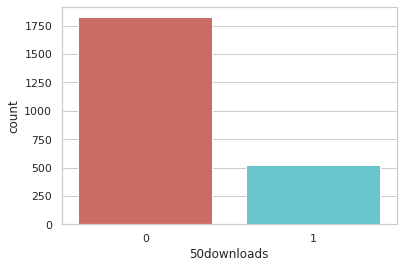

<Figure size 432x288 with 0 Axes>

In [88]:
sns.countplot(x='50downloads',data=new_df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [81]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

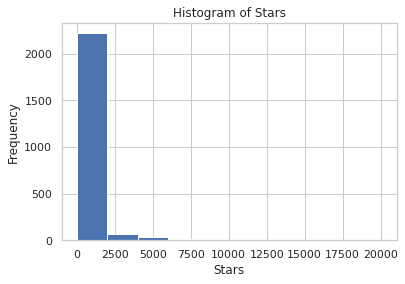

In [82]:
%matplotlib inline
new_df.stars.hist()
plt.title('Histogram of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.savefig('hist_stars')

In [43]:
cols=['forks', 'downloads', 'issues', 'issuesClosed', 'stars', 'commits', 'release_counts'] 
X=new_df[cols]
y=new_df['20downloads']

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.225775
         Iterations 24
                           Logit Regression Results                           
Dep. Variable:            20downloads   No. Observations:                 1634
Model:                          Logit   Df Residuals:                     1627
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Apr 2022   Pseudo R-squ.:                  0.5978
Time:                        11:28:12   Log-Likelihood:                -368.92
converged:                       True   LL-Null:                       -917.20
Covariance Type:            nonrobust   LLR p-value:                1.150e-233
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
forks              0.0085      0.002      4.235      0.000       0.005       0.012
downloads       

/users/kent/jmaharja/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/users/kent/jmaharja/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = logreg.predict(X_test)

In [94]:
X_test.shape

(491, 7)

In [95]:
y_test.value_counts()

0    376
1    115
Name: 20downloads, dtype: int64

In [52]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.978


/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[363  13]
 [  4 111]]


In [55]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

NameError: name 'classifier' is not defined

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       376
           1       0.90      0.97      0.93       115

    accuracy                           0.97       491
   macro avg       0.94      0.97      0.95       491
weighted avg       0.97      0.97      0.97       491



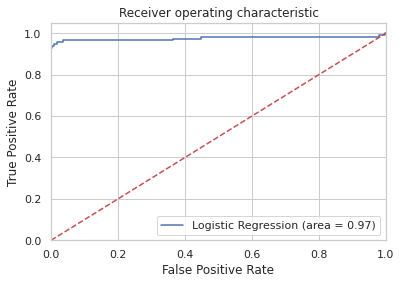

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()